threshold를 trackbar로 조절하여 이미지를 나타내보자

In [1]:
import numpy as np
import cv2
import cv2_plus

In [2]:
def nothing(x):
    pass

이미지 grayscale로 읽어오기

In [3]:
imgfile = 'images/document.jpg'
img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)

### Resize image

cv2.resize(img, dsize, fx, fy, interpolation)
- img : 이미지
- dsize : 가로방향 픽셀수, 세로방향 픽셀수
- fx : 가로 사이즈 배수. 해당 배수로 resizing. 2면 2배로 resizing
- fy : 세로 사이즈 배수
- interpolation : resizing 수행 시 interpolation 방법 설정

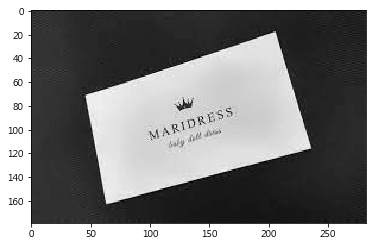

In [4]:
cv2_plus.imshow(img,img_type=0)

In [5]:
img.shape # (세로, 가로)

(179, 282)

img.shape[1]:img.shape[0] = x:600 = 가로:세로

In [6]:
r = 600.0 / img.shape[0]
dim = (int(img.shape[1] * r), 600)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [7]:
dim

(945, 600)

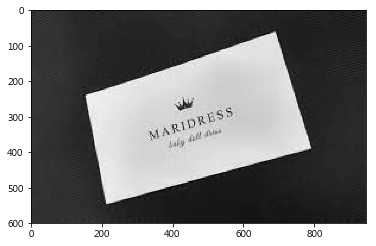

In [8]:
cv2_plus.imshow(img,img_type=0)

In [9]:
WindowName = "Window"
TrackbarName = "Threshold"

# Make Window and Trackbar
cv2.namedWindow(WindowName)

**cv2.createTrackbar(trackbarName, windowName, value, count, onChange) : 트랙바를 저장된 윈도우에 생성**
- trackbarName : 트랙바 이름
- windowName : 윈도우 이름
- value : Trackbar생성 초기값
- count : Trackbar의 Max값, Min = 0으로 고정
- onChange : Slide 값이 변경될 때 호출 되는 Callback 함수. 트랙바 이벤트가 발생할 때 처리할 일(아무것도 없다면 pass)

In [10]:
cv2.createTrackbar(TrackbarName, WindowName, 50, 255, nothing)

# 이미지 객체 초기화
Threshold = np.zeros(img.shape, np.uint8)

**cv2.getTrackbarPos(TrackbarName, WindowName) : 트랙바의 현재 위치 return**
- TrackbarName : 트랙바 이름
- WindowName : 트랙바가 생성된 윈도 이름

cv2.threshold(img, thresh, maxval, type) : threshold값보다 크면 maxval로 할당
- img : Grayscale 이미지
- thresh : 픽셀 임계값
- maxval : 임계값을 넘었을 때 적용 value
- type : thresholding 적용 스타일

**참고로 트랙바를 움직이고 esc이외 다른 키를 눌려줘야 변한다.**

In [11]:
while True:
    # 트랙바의 현재 위치 return
    TrackbarPos = cv2.getTrackbarPos(TrackbarName, WindowName)
    # 트랙바의 값을 받아 출력
    cv2.threshold(img, TrackbarPos, 255, cv2.THRESH_BINARY, Threshold)
    # Show in window
    cv2.imshow(WindowName, Threshold)

    # wait for ESC key to exit
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break